# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Salsabila Tuada
- **Email:** salsabilatuadaa7@gmail.com
- **ID Dicoding:** salsabilatuadaa

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penyewaan sepeda di setiap harinya? Apakah terdapat pengaruh antara hari kerja dan hari libur?
- Bagaimana pengaruh musim dan kondisi cuaca dengan tingkat rata-rata penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [105]:
# Memuat tabel day
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [106]:
# Memuat tabel hour
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Data day

In [107]:
# Melihat info data day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada kolom dteday memiliki tipe data object dimana seharusnya kolom ini tipe datanya adalah date karena merepresentasikan tanggal. Kemudian pada kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit akan diubah ke tipe datanya menjadi kategori untuk memudahkan analisis data

In [108]:
# Mengecek null pada data
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [109]:
# Mengecek data yang terduplikat
print("Jumlah data terduplikat: ", day_df.duplicated().sum())

Jumlah data terduplikat:  0


In [110]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Data Hour

In [111]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [112]:
# Mengecek null pada data
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [113]:
# Mengecek data yang terduplikat
print("Jumlah data terduplikat: ", hour_df.duplicated().sum())

Jumlah data terduplikat:  0


In [114]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Untuk data hour pada prosess assesing ini hasil yang didapat hampir sama seperti data day

### Cleaning Data

#### Cleaning data day

In [115]:
# Mengganti nama kolom supaya mudah dipahami
day_df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "total_count"}, inplace=True
)

In [116]:
# Mengubah tipe data
day_df['date'] = pd.to_datetime(day_df['date'])
day_df['season'] = day_df.season.astype('category')
day_df['weather'] = day_df.weather.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')

In [117]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   year         731 non-null    int64         
 4   month        731 non-null    int64         
 5   holiday      731 non-null    int64         
 6   weekday      731 non-null    int64         
 7   workingday   731 non-null    category      
 8   weather      731 non-null    category      
 9   temp         731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  humidity     731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  total_count  731 non-null    int64         
dtypes: categ

In [118]:
# Replace nilai untuk kolom season
day_df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

# Replace nilai untuk kolom year
day_df.year.replace((0,1), (2011, 2012), inplace=True)

# Replace nilai untuk kolom weather
day_df.weather.replace((1,2,3,4), ('Clear', 'Mist', 'Light_Snow', 'Heavy_Rain'), inplace=True)

# Replace nilai untuk kolom workingday
day_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

In [119]:
day_df.head(100)

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Winter,2011,1,0,6,No,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,1,0,0,No,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,1,0,1,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,1,0,2,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,1,0,3,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2011-04-06,Spring,2011,4,0,3,Yes,Clear,0.390833,0.387608,0.470833,0.263063,413,2395,2808
96,97,2011-04-07,Spring,2011,4,0,4,Yes,Clear,0.437500,0.433696,0.602917,0.162312,571,2570,3141
97,98,2011-04-08,Spring,2011,4,0,5,Yes,Mist,0.335833,0.324479,0.836250,0.226992,172,1299,1471
98,99,2011-04-09,Spring,2011,4,0,6,No,Mist,0.342500,0.341529,0.877500,0.133083,879,1576,2455


In [120]:
day_df = day_df.drop(['temp', 'atemp', 'humidity','windspeed'], axis=1)

#### Cleaning data hour

In [121]:
# Mengganti nama kolom supaya mudah dipahami
hour_df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "hr" : "hour",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "total_count"}, inplace=True
)

In [122]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      17379 non-null  int64  
 1   date         17379 non-null  object 
 2   season       17379 non-null  int64  
 3   year         17379 non-null  int64  
 4   month        17379 non-null  int64  
 5   hour         17379 non-null  int64  
 6   holiday      17379 non-null  int64  
 7   weekday      17379 non-null  int64  
 8   workingday   17379 non-null  int64  
 9   weather      17379 non-null  int64  
 10  temp         17379 non-null  float64
 11  atemp        17379 non-null  float64
 12  humidity     17379 non-null  float64
 13  windspeed    17379 non-null  float64
 14  casual       17379 non-null  int64  
 15  registered   17379 non-null  int64  
 16  total_count  17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [123]:
# Mengubah tipe data
hour_df['date'] = pd.to_datetime(hour_df['date'])
hour_df['season'] = hour_df.season.astype('category')
hour_df['weather'] = hour_df.weather.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')

In [124]:
# Replace nilai untuk kolom season
hour_df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

# Replace nilai untuk kolom year
hour_df.year.replace((0,1), (2011, 2012), inplace=True)

# Replace nilai untuk kolom weather
hour_df.weather.replace((1,2,3,4), ('Clear', 'Mist', 'Light_Snow', 'Heavy_Rain'), inplace=True)

# Replace nilai untuk kolom workingday
hour_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

In [125]:
hour_df.head(100)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Winter,2011,1,0,0,6,No,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Winter,2011,1,1,0,6,No,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Winter,2011,1,2,0,6,No,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Winter,2011,1,3,0,6,No,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Winter,2011,1,4,0,6,No,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2011-01-05,Winter,2011,1,4,0,3,Yes,Clear,0.24,0.2273,0.48,0.2239,0,2,2
96,97,2011-01-05,Winter,2011,1,5,0,3,Yes,Clear,0.22,0.2273,0.47,0.1642,0,3,3
97,98,2011-01-05,Winter,2011,1,6,0,3,Yes,Clear,0.20,0.1970,0.47,0.2239,0,33,33
98,99,2011-01-05,Winter,2011,1,7,0,3,Yes,Clear,0.18,0.1818,0.43,0.1940,1,87,88


In [126]:
hour_df = hour_df.drop(['temp', 'atemp', 'humidity','windspeed'], axis=1)

## Exploratory Data Analysis (EDA)

In [127]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   year         731 non-null    int64         
 4   month        731 non-null    int64         
 5   holiday      731 non-null    int64         
 6   weekday      731 non-null    int64         
 7   workingday   731 non-null    category      
 8   weather      731 non-null    category      
 9   casual       731 non-null    int64         
 10  registered   731 non-null    int64         
 11  total_count  731 non-null    int64         
dtypes: category(3), datetime64[ns](1), int64(8)
memory usage: 54.1 KB


In [128]:
# Merge data day dan hour
bike_all_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="inner",
    left_on="date",
    right_on="date",
    suffixes=('_hour', '_day')
)
bike_all_df.head()

,instant_hour,date,season_hour,year_hour,month_hour,hour,holiday_hour,weekday_hour,workingday_hour,weather_hour,...,season_day,year_day,month_day,holiday_day,weekday_day,workingday_day,weather_day,casual_day,registered_day,total_count_day
0,1,2011-01-01,Winter,2011,1,0,0,6,No,Clear,...,Winter,2011,1,0,6,No,Mist,331,654,985
1,2,2011-01-01,Winter,2011,1,1,0,6,No,Clear,...,Winter,2011,1,0,6,No,Mist,331,654,985
2,3,2011-01-01,Winter,2011,1,2,0,6,No,Clear,...,Winter,2011,1,0,6,No,Mist,331,654,985
3,4,2011-01-01,Winter,2011,1,3,0,6,No,Clear,...,Winter,2011,1,0,6,No,Mist,331,654,985
4,5,2011-01-01,Winter,2011,1,4,0,6,No,Clear,...,Winter,2011,1,0,6,No,Mist,331,654,985


In [129]:
bike_all_df.describe(include="all")

<ipython-input-129-93437f00b03e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bike_all_df.describe(include="all")


,instant_hour,date,season_hour,year_hour,month_hour,hour,holiday_hour,weekday_hour,workingday_hour,weather_hour,...,season_day,year_day,month_day,holiday_day,weekday_day,workingday_day,weather_day,casual_day,registered_day,total_count_day
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379,...,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,NaN,NaN,NaN,NaN,2,4,...,4,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Summer,NaN,NaN,NaN,NaN,NaN,Yes,Clear,...,Summer,NaN,NaN,NaN,NaN,Yes,Clear,NaN,NaN,NaN
freq,NaN,24,4496,NaN,NaN,NaN,NaN,NaN,11865,11413,...,4496,NaN,NaN,NaN,NaN,11865,11040,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,2011.502561,6.537775,11.546752,0.028770,3.003683,NaN,NaN,...,NaN,2011.502561,6.537775,0.028770,3.003683,NaN,NaN,854.339720,3679.353242,4533.692963
std,5017.0295,NaN,NaN,0.500008,3.438776,6.914405,0.167165,2.005771,NaN,NaN,...,NaN,0.500008,3.438776,0.167165,2.005771,NaN,NaN,685.686754,1544.953518,1917.376947
min,1.0000,NaN,NaN,2011.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,2011.000000,1.000000,0.000000,0.000000,NaN,NaN,2.000000,20.000000,22.000000
25%,4345.5000,NaN,NaN,2011.000000,4.000000,6.000000,0.000000,1.000000,NaN,NaN,...,NaN,2011.000000,4.000000,0.000000,1.000000,NaN,NaN,318.000000,2545.000000,3214.000000


In [130]:
# Melihat hubungan antara hari libur dan kerja dengan total penyewaan
bike_all_df.groupby(['workingday_day'])['total_count_day'].mean().reset_index()

,workingday_day,total_count_day
0,No,4341.834059
1,Yes,4622.855204


In [131]:
# Melihat hubungan antara weather dengan total penyewaan
bike_all_df.groupby(['weather_day'])['total_count_day'].mean().reset_index()

,weather_day,total_count_day
0,Clear,4895.177083
1,Mist,4062.717595
2,Light_Snow,1914.700855


In [132]:
# Melihat hubungan antara season dengan total penyewaan
bike_all_df.groupby(['season_day'])['total_count_day'].mean().reset_index()

,season_day,total_count_day
0,Winter,2635.348185
1,Spring,4995.253119
2,Summer,5654.093194
3,Fall,4765.366021


In [133]:
# Melihat hubungan antara hour dengan total penyewaan
bike_all_df.groupby(['hour'])['total_count_hour'].mean().reset_index()

,hour,total_count_hour
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penyewaan sepeda di setiap harinya? Apakah terdapat pengaruh antara hari kerja dan hari libur?


<ipython-input-135-6bceb17b65d5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


([<matplotlib.axis.XTick at 0x7dd765120ca0>,
 [Text(0.0, 0, 'Weekends'), Text(1.0, 0, 'Weekdays')])

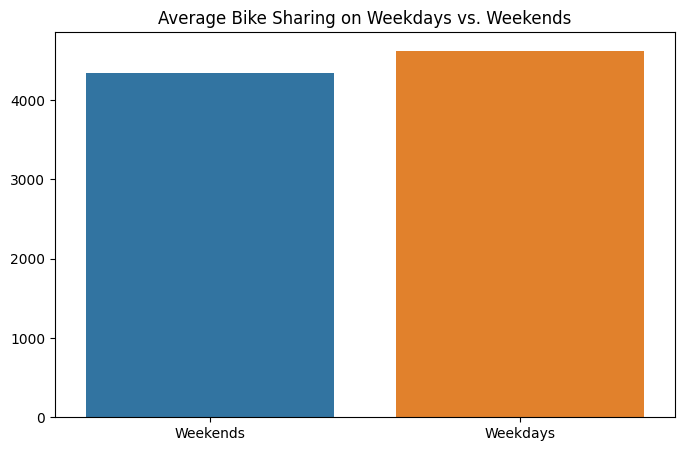

In [135]:
workingday_df = bike_all_df.groupby(['workingday_day'])['total_count_day'].mean().reset_index()

plt.figure(figsize=(8, 5))

colors = ["#1f77b4", "#ff7f0e"]

sns.barplot(
    x="workingday_day",
    y="total_count_day",
    data=workingday_df.sort_values(by="total_count_day", ascending=False),
    palette = colors
)

plt.title('Average Bike Sharing on Weekdays vs. Weekends')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(['No', 'Yes'], ['Weekends', 'Weekdays'])

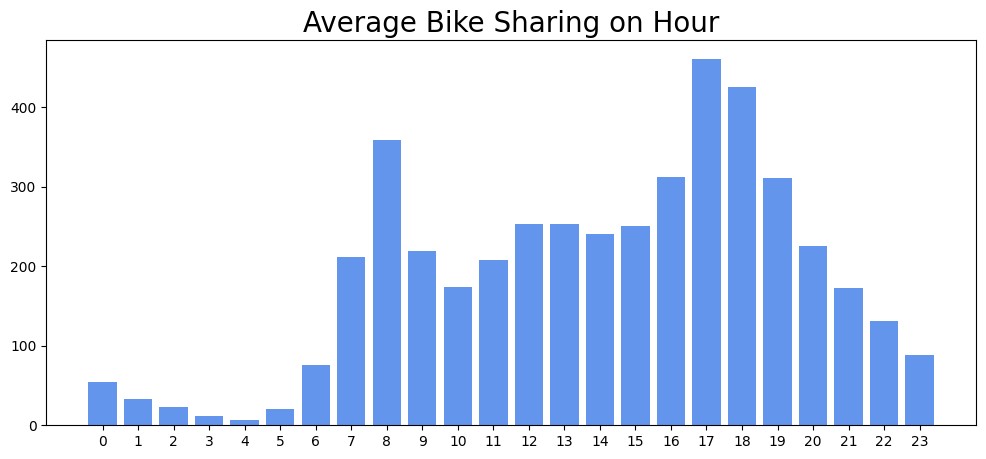

In [134]:
sewa_per_jam= bike_all_df.groupby(['hour'])['total_count_hour'].mean()

plt.figure(figsize=(12, 5))
plt.bar(sewa_per_jam.index, sewa_per_jam.values, color='#6495ED')

plt.title("Average Bike Sharing on Hour", fontsize=20)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(sewa_per_jam.index)
plt.show()

### Pertanyaan 2: Bagaimana pengaruh musim dan kondisi cuaca dengan tingkat rata-rata penyewaan sepeda?


<ipython-input-139-f4a2ae5f42d7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="weather_day", x="total_count_day", data=weather, palette="plasma", ax=ax[0])
<ipython-input-139-f4a2ae5f42d7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="season_day", x="total_count_day", data=season, palette="viridis", ax=ax[1])


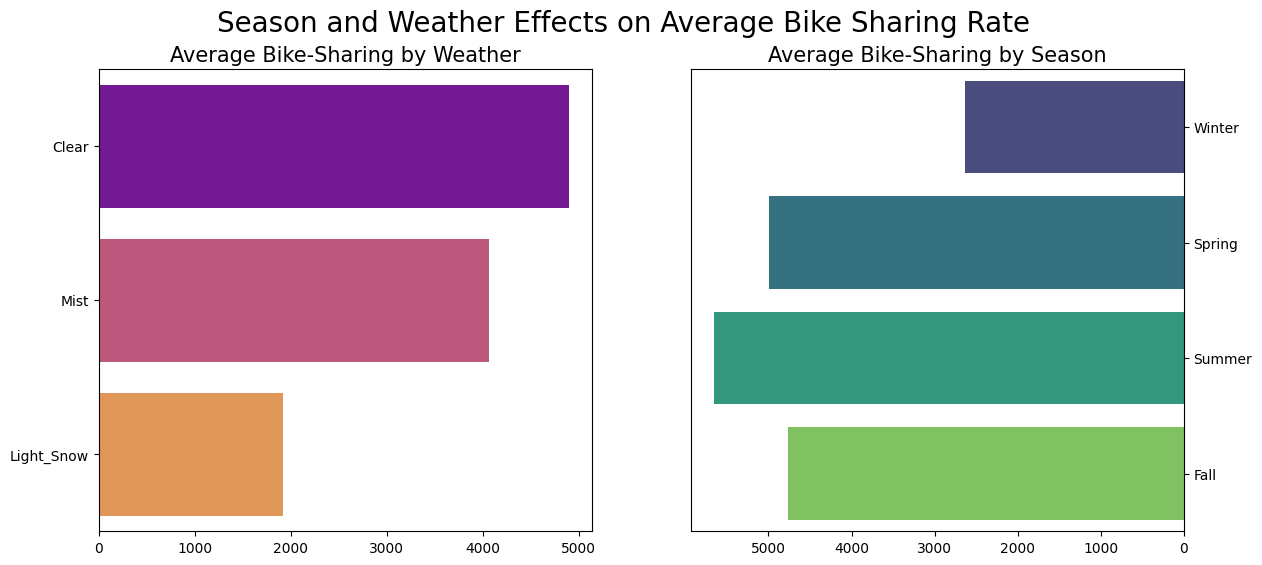

In [139]:
weather = bike_all_df.groupby(['weather_day'])['total_count_day'].mean().reset_index()
season = bike_all_df.groupby(['season_day'])['total_count_day'].mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.barplot(y="weather_day", x="total_count_day", data=weather, palette="plasma", ax=ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title("Average Bike-Sharing by Weather", loc="center", fontsize=15)


sns.barplot(y="season_day", x="total_count_day", data=season, palette="viridis", ax=ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_title("Average Bike-Sharing by Season", loc="center", fontsize=15)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

plt.suptitle("Season and Weather Effects on Average Bike Sharing Rate", fontsize=20)
plt.show()


## Conclusion

- **Conclusion Pertanyaan 1** : Rata rata penyewaan sepeda lebih banyak dilakukan ketika hari tidak libur atau ketika workingday (hari kerja Senin - Jum'at) yaitu pada pukul 8 AM, 5 PM, dan 6 PM
  - Hal ini mungkin disebabkan karena pada hari kerja, penggunaan transportasi baik umum maupun pribadi meningkat, sehingga banyak orang lebih memilih menggunakkan sepeda untuk bepergian. Selain itu, pada hari kerja orang-orang cenderung melaksanakan rutinitasnya sehari-hari seperti bekerja, sekolah, berbelanja, dll yang biasanya dimulai dari pagi hari. Pukul 8 AM merupakan jam yang ideal ketika orang akan bepergian menuju tempat kerja atau sekolah. Menggunakkan sepeda bisa menjadi pilihan yang tepat untuk perjalanan yang tidak terlalu jauh. Kemudian pada pukul 5 PM dan 6 PM di hari kerja, kebanyakan orang telah selesai dengan pekerjaan atau kegiatan harian mereka. Ini merupakan waktu senggang di mana orang memiliki kesempatan untuk bersepeda. Selain itu cuaca yang terang dan hangat pada jam-jam tersebut membuat kondisi yang ideal untuk bersepeda dan menikmati waktu di luar ruangan setelah seharian beraktivitas
  

- **Conclusion Pertanyaan 2** : Rata-rata penyewaan sepeda paling banyak dilakukan pada musim panas dan ketika cuaca clear atau jernih
  - Pada musim panas cenderung memiliki suasana yang hangat dan cerah, sehingga menciptakan kondisi yang nyaman untuk beraktivitas di luar ruangan. Selain cuaca yang cerah  biasanya membuat pemandangan serta udara terlihat lebih indah dan nyaman untuk dinikmati, kondisi jalan pada musim panas umumnya juga lebih baik dan aman untuk bersepeda. Tentu saja hal tersebut bisa menjadi alasan yang kuat  orang memilih untuk bersepeda pada musim panas yang cenderung memiliki cuaca hangat dan cerah
  


In [137]:
bike_all_df.to_csv("bike_all_data.csv", index=False)